In [9]:
import pandas as pd

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

In [1]:
from pyspark import SparkContext
sc = SparkContext()
from pyspark.sql import SparkSession
# 初始化spark会话
spark = SparkSession.builder.appName('birthrate').getOrCreate()

24/02/23 00:24:20 WARN Utils: Your hostname, dongyanshens-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.100.116 instead (on interface en0)
24/02/23 00:24:20 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/23 00:24:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/02/23 00:24:21 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/02/23 00:24:21 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


# 切记改路径！

In [2]:
save_path = "/Users/dongyanshen/Desktop/DYSProjects/TBProject/BirthRate_24F19/BirthRate_24F19/births_train.csv"

births = spark.read.format("csv") \
        .load(save_path, 
              header=True, inferSchema=True, encoding="utf-8", sep=',')

In [4]:
births.printSchema()

root
 |-- INFANT_ALIVE_AT_REPORT: string (nullable = true)
 |-- BIRTH_YEAR: integer (nullable = true)
 |-- BIRTH_MONTH: integer (nullable = true)
 |-- BIRTH_PLACE: integer (nullable = true)
 |-- MOTHER_AGE_YEARS: integer (nullable = true)
 |-- MOTHER_RACE_6CODE: integer (nullable = true)
 |-- MOTHER_EDUCATION: integer (nullable = true)
 |-- FATHER_COMBINED_AGE: integer (nullable = true)
 |-- FATHER_EDUCATION: integer (nullable = true)
 |-- MONTH_PRECARE_RECODE: integer (nullable = true)
 |-- CIG_BEFORE: integer (nullable = true)
 |-- CIG_1_TRI: integer (nullable = true)
 |-- CIG_2_TRI: integer (nullable = true)
 |-- CIG_3_TRI: integer (nullable = true)
 |-- MOTHER_HEIGHT_IN: integer (nullable = true)
 |-- MOTHER_BMI_RECODE: integer (nullable = true)
 |-- MOTHER_PRE_WEIGHT: integer (nullable = true)
 |-- MOTHER_DELIVERY_WEIGHT: integer (nullable = true)
 |-- MOTHER_WEIGHT_GAIN: integer (nullable = true)
 |-- DIABETES_PRE: string (nullable = true)
 |-- DIABETES_GEST: string (nullable = t

In [5]:
pdf = births.toPandas()
pdf.head()

24/02/22 16:15:36 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


CodeCache: size=131072Kb used=19564Kb max_used=19575Kb free=111507Kb
 bounds [0x00000001089e0000, 0x0000000109d20000, 0x00000001109e0000]
 total_blobs=7863 nmethods=6948 adapters=826
 compilation: disabled (not enough contiguous free space left)


,INFANT_ALIVE_AT_REPORT,BIRTH_YEAR,BIRTH_MONTH,BIRTH_PLACE,MOTHER_AGE_YEARS,MOTHER_RACE_6CODE,MOTHER_EDUCATION,FATHER_COMBINED_AGE,FATHER_EDUCATION,MONTH_PRECARE_RECODE,...,INFANT_ANTIBIOTICS,INFANT_SEIZURES,INFANT_NO_ABNORMALITIES,INFANT_ANCEPHALY,INFANT_MENINGOMYELOCELE,INFANT_LIMB_REDUCTION,INFANT_DOWN_SYNDROME,INFANT_SUSPECTED_CHROMOSOMAL_DISORDER,INFANT_NO_CONGENITAL_ANOMALIES_CHECKED,INFANT_BREASTFED
0,N,2015,3,1,23,1,3,99,9,1,...,N,N,1,N,N,N,N,N,1,U
1,N,2015,4,1,37,2,3,52,3,1,...,N,N,1,N,N,N,N,N,1,N
2,N,2015,9,1,33,1,2,39,2,1,...,N,N,1,N,N,N,N,N,1,N
3,N,2015,6,1,35,4,9,37,6,1,...,N,N,0,N,N,N,N,N,1,U
4,N,2015,10,1,33,1,4,34,6,1,...,N,N,1,N,N,N,N,N,1,N


In [6]:
pdf.shape

(45429, 54)

In [7]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45429 entries, 0 to 45428
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   INFANT_ALIVE_AT_REPORT                  45429 non-null  object
 1   BIRTH_YEAR                              45429 non-null  int32 
 2   BIRTH_MONTH                             45429 non-null  int32 
 3   BIRTH_PLACE                             45429 non-null  int32 
 4   MOTHER_AGE_YEARS                        45429 non-null  int32 
 5   MOTHER_RACE_6CODE                       45429 non-null  int32 
 6   MOTHER_EDUCATION                        45429 non-null  int32 
 7   FATHER_COMBINED_AGE                     45429 non-null  int32 
 8   FATHER_EDUCATION                        45429 non-null  int32 
 9   MONTH_PRECARE_RECODE                    45429 non-null  int32 
 10  CIG_BEFORE                              45429 non-null  int32 
 11  CI

In [10]:
pdf.describe()

,BIRTH_YEAR,BIRTH_MONTH,BIRTH_PLACE,MOTHER_AGE_YEARS,MOTHER_RACE_6CODE,MOTHER_EDUCATION,FATHER_COMBINED_AGE,FATHER_EDUCATION,MONTH_PRECARE_RECODE,CIG_BEFORE,CIG_1_TRI,CIG_2_TRI,CIG_3_TRI,MOTHER_HEIGHT_IN,MOTHER_BMI_RECODE,MOTHER_PRE_WEIGHT,MOTHER_DELIVERY_WEIGHT,MOTHER_WEIGHT_GAIN,NO_RISK,NO_INFECTIONS_REPORTED,DELIV_METHOD_RECODE_COMB,ATTENDANT_BIRTH,APGAR_5,APGAR_5_RECODE,APGAR_10,APGAR_10_RECODE,OBSTETRIC_GESTATION_WEEKS,INFANT_WEIGHT_GRAMS,INFANT_NO_ABNORMALITIES,INFANT_NO_CONGENITAL_ANOMALIES_CHECKED
count,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000
mean,2014.497193,6.564023,1.055603,28.298422,1.535825,4.285280,44.549759,5.180876,1.684981,3.775012,3.305069,3.138854,3.094851,65.120892,3.446741,214.498404,223.626098,30.739968,0.737943,1.048889,1.309714,1.278809,8.776751,2.771247,59.986044,3.721610,32.856677,2599.523960,0.851791,1.053842
std,0.499998,3.410593,0.447114,6.078526,1.040021,1.916552,27.550495,2.562577,1.242134,15.716124,15.558655,15.582429,15.792449,6.451979,1.965228,210.208633,180.014057,26.225580,0.705474,0.803795,0.554511,0.817322,16.612631,1.414360,41.515687,1.824714,10.089984,2079.516471,0.812629,0.878734
min,2014.000000,1.000000,1.000000,12.000000,1.000000,1.000000,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,75.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,17.000000,227.000000,0.000000,0.000000
25%,2014.000000,4.000000,1.000000,24.000000,1.000000,3.000000,28.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,62.000000,2.000000,130.000000,154.000000,13.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,23.000000,610.000000,1.000000,1.000000
50%,2014.000000,7.000000,1.000000,28.000000,1.000000,4.000000,33.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,64.000000,3.000000,154.000000,180.000000,25.000000,1.000000,1.000000,1.000000,1.000000,8.000000,3.000000,88.000000,5.000000,37.000000,2880.000000,1.000000,1.000000
75%,2015.000000,9.000000,1.000000,33.000000,2.000000,6.000000,42.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,66.000000,4.000000,194.000000,215.000000,39.000000,1.000000,1.000000,2.000000,1.000000,9.000000,4.000000,88.000000,5.000000,39.000000,3480.000000,1.000000,1.000000
max,2015.000000,12.000000,9.000000,50.000000,6.000000,9.000000,99.000000,9.000000,5.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.000000,999.000000,999.000000,99.000000,9.000000,9.000000,9.000000,9.000000,99.000000,5.000000,99.000000,5.000000,99.000000,9999.000000,9.000000,9.000000


In [13]:
pdf.describe(include=["object", "bool"])

,INFANT_ALIVE_AT_REPORT,DIABETES_PRE,DIABETES_GEST,HYP_TENS_PRE,HYP_TENS_GEST,PREV_BIRTH_PRETERM,LABOR_IND,LABOR_AUGM,STEROIDS,ANTIBIOTICS,ANESTHESIA,INFANT_SEX,INFANT_ASSIST_VENTI,INFANT_ASSIST_VENTI_6HRS,INFANT_NICU_ADMISSION,INFANT_SURFACANT,INFANT_ANTIBIOTICS,INFANT_SEIZURES,INFANT_ANCEPHALY,INFANT_MENINGOMYELOCELE,INFANT_LIMB_REDUCTION,INFANT_DOWN_SYNDROME,INFANT_SUSPECTED_CHROMOSOMAL_DISORDER,INFANT_BREASTFED
count,45429,45429,45429,45429,45429,45429,45429,45429,45429,45429,45429,45429,45429,45429,45429,45429,45429,45429,45429,45429,45429,45429,45429,45429
unique,2,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3,3,4,4,3
top,Y,N,N,N,N,N,N,N,N,N,Y,M,N,N,N,N,N,N,N,N,N,N,N,N
freq,23349,44689,43259,44156,43110,42896,37108,38435,42961,34537,26903,24175,40165,43127,37302,43811,43232,44932,44504,44832,44810,44785,44428,19124


In [17]:
pdf.groupby(['INFANT_ALIVE_AT_REPORT']).describe(percentiles=[])

BIRTH_YEAR                                         \
                            count         mean       std     min     50%   
INFANT_ALIVE_AT_REPORT                                                     
N                         22080.0  2014.493433  0.499968  2014.0  2014.0   
Y                         23349.0  2014.500749  0.500010  2014.0  2015.0   

                               BIRTH_MONTH                                \
                           max       count      mean       std  min  50%   
INFANT_ALIVE_AT_REPORT                                                     
N                       2015.0     22080.0  6.508016  3.401501  1.0  7.0   
Y                       2015.0     23349.0  6.616986  3.418398  1.0  7.0   

                             BIRTH_PLACE                                     \
                         max       count      mean       std  min  50%  max   
INFANT_ALIVE_AT_REPORT                                                        
N                       12.0     22080.0  1.079529  0.555141  1.0  1.0  9.0   
Y                       12.0     23349.0  1.032978  0.310612  1.0  1.0  7.0   

                       MOTHER_AGE_YEARS                                   \
                                  count       mean       std   min   50%   
INFANT_ALIVE_AT_REPORT                                                     
N                               22080.0  28.208288  6.279353  12.0  28.0   
Y                               23349.0  28.383657  5.881173  13.0  28.0   

                             MOTHER_RACE_6CODE                                \
                         max             count      mean       std  min  50%   
INFANT_ALIVE_AT_REPORT                                                         
N                       50.0           22080.0  1.588496  1.007447  1.0  1.0   
Y                       50.0           23349.0  1.486017  1.067547  1.0  1.0   

                            MOTHER_EDUCATION                                \
                        max            count      mean       std  min  50%   
INFANT_ALIVE_AT_REPORT                                                       
N                       6.0          22080.0  4.257201  2.033110  1.0  4.0   
Y                       6.0          23349.0  4.311833  1.799036  1.0  4.0   

                            FATHER_COMBINED_AGE                              \
                        max               count       mean        std   min   
INFANT_ALIVE_AT_REPORT                                                        
N                       9.0             22080.0  49.807020  30.698576  13.0   
Y                       9.0             23349.0  39.578226  23.125767  14.0   

                                   FATHER_EDUCATION                           \
                         50%   max            count      mean       std  min   
INFANT_ALIVE_AT_REPORT                                                         
N                       34.0  99.0          22080.0  5.488315  2.733137  1.0   
Y                       32.0  99.0          23349.0  4.890145  2.353514  1.0   

                                 MONTH_PRECARE_RECODE                      \
                        50%  max                count      mean       std   
INFANT_ALIVE_AT_REPORT                                                      
N                       5.0  9.0              22080.0  1.946286  1.466140   
Y                       4.0  9.0              23349.0  1.437877  0.918495   

                                      CIG_BEFORE                            \
                        min  50%  max      count      mean        std  min   
INFANT_ALIVE_AT_REPORT                                                       
N                       1.0  1.0  5.0    22080.0  4.786911  18.185036  0.0   
Y                       1.0  1.0  5.0    23349.0  2.818108  12.883062  0.0   

                                  CIG_1_TRI                                 \
                        50%   max     co

In [50]:
23349.0/22080.0

1.0574728260869566

<Axes: title={'center': 'Target Count'}, ylabel='INFANT_ALIVE_AT_REPORT'>

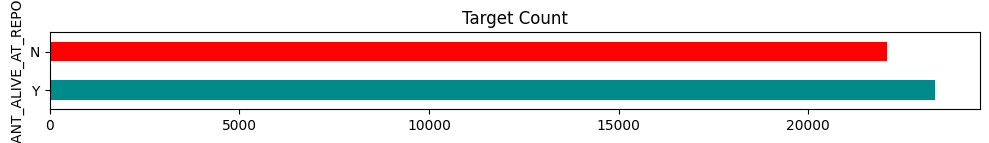

In [19]:
pdf['INFANT_ALIVE_AT_REPORT'].value_counts().plot(kind='barh', figsize=(12,1), title='Target Count', color=['darkcyan','red'])

In [21]:
import matplotlib.pyplot as plt
import seaborn as sb

In [29]:
number_cols =  ['BIRTH_YEAR', 'BIRTH_MONTH', 'BIRTH_PLACE', 'MOTHER_AGE_YEARS', 'MOTHER_RACE_6CODE', 'MOTHER_EDUCATION', 'FATHER_COMBINED_AGE', 'FATHER_EDUCATION', 'MONTH_PRECARE_RECODE', 'CIG_BEFORE', 'CIG_1_TRI', 'CIG_2_TRI', 'CIG_3_TRI', 'MOTHER_HEIGHT_IN', 'MOTHER_BMI_RECODE', 'MOTHER_PRE_WEIGHT', 'MOTHER_DELIVERY_WEIGHT', 'MOTHER_WEIGHT_GAIN', 'NO_RISK', 'NO_INFECTIONS_REPORTED', 'DELIV_METHOD_RECODE_COMB', 'ATTENDANT_BIRTH', 'APGAR_5', 'APGAR_5_RECODE', 'APGAR_10', 'APGAR_10_RECODE', 'OBSTETRIC_GESTATION_WEEKS', 'INFANT_WEIGHT_GRAMS', 'INFANT_NO_ABNORMALITIES', 'INFANT_NO_CONGENITAL_ANOMALIES_CHECKED']
string_cols =  ['INFANT_ALIVE_AT_REPORT', 'DIABETES_PRE', 'DIABETES_GEST', 'HYP_TENS_PRE', 'HYP_TENS_GEST', 'PREV_BIRTH_PRETERM', 'LABOR_IND', 'LABOR_AUGM', 'STEROIDS', 'ANTIBIOTICS', 'ANESTHESIA', 'INFANT_SEX', 'INFANT_ASSIST_VENTI', 'INFANT_ASSIST_VENTI_6HRS', 'INFANT_NICU_ADMISSION', 'INFANT_SURFACANT', 'INFANT_ANTIBIOTICS', 'INFANT_SEIZURES', 'INFANT_ANCEPHALY', 'INFANT_MENINGOMYELOCELE', 'INFANT_LIMB_REDUCTION', 'INFANT_DOWN_SYNDROME', 'INFANT_SUSPECTED_CHROMOSOMAL_DISORDER', 'INFANT_BREASTFED']

In [31]:
from sklearn import preprocessing

for col in string_cols:
    le = preprocessing.LabelEncoder()
    le.fit(pdf[col].values)
    pdf[col] = le.transform(pdf[col].values)
    
pdf.head()

,INFANT_ALIVE_AT_REPORT,BIRTH_YEAR,BIRTH_MONTH,BIRTH_PLACE,MOTHER_AGE_YEARS,MOTHER_RACE_6CODE,MOTHER_EDUCATION,FATHER_COMBINED_AGE,FATHER_EDUCATION,MONTH_PRECARE_RECODE,CIG_BEFORE,CIG_1_TRI,CIG_2_TRI,CIG_3_TRI,MOTHER_HEIGHT_IN,MOTHER_BMI_RECODE,MOTHER_PRE_WEIGHT,MOTHER_DELIVERY_WEIGHT,MOTHER_WEIGHT_GAIN,DIABETES_PRE,DIABETES_GEST,HYP_TENS_PRE,HYP_TENS_GEST,PREV_BIRTH_PRETERM,NO_RISK,NO_INFECTIONS_REPORTED,LABOR_IND,LABOR_AUGM,STEROIDS,ANTIBIOTICS,ANESTHESIA,DELIV_METHOD_RECODE_COMB,ATTENDANT_BIRTH,APGAR_5,APGAR_5_RECODE,APGAR_10,APGAR_10_RECODE,INFANT_SEX,OBSTETRIC_GESTATION_WEEKS,INFANT_WEIGHT_GRAMS,INFANT_ASSIST_VENTI,INFANT_ASSIST_VENTI_6HRS,INFANT_NICU_ADMISSION,INFANT_SURFACANT,INFANT_ANTIBIOTICS,INFANT_SEIZURES,INFANT_NO_ABNORMALITIES,INFANT_ANCEPHALY,INFANT_MENINGOMYELOCELE,INFANT_LIMB_REDUCTION,INFANT_DOWN_SYNDROME,INFANT_SUSPECTED_CHROMOSOMAL_DISORDER,INFANT_NO_CONGENITAL_ANOMALIES_CHECKED,INFANT_BREASTFED
0,0,2015,3,1,23,1,3,99,9,1,0,0,0,0,66,3,166,183,17,0,0,0,0,0,1,1,0,0,0,0,0,1,1,99,5,99,5,1,22,546,0,0,0,0,0,0,1,0,0,0,1,1,1,1
1,0,2015,4,1,37,2,3,52,3,1,0,0,0,0,65,5,215,230,15,0,0,0,0,0,1,1,0,0,0,0,2,1,1,3,1,3,1,1,20,312,0,0,0,0,0,0,1,0,0,0,1,1,1,0
2,0,2015,9,1,33,1,2,39,2,1,10,10,0,0,66,4,188,270,82,0,0,0,0,0,1,1,0,0,0,0,0,1,1,2,1,2,1,0,21,397,0,0,0,0,0,0,1,0,0,0,1,1,1,0
3,0,2015,6,1,35,4,9,37,6,1,0,0,0,0,66,5,226,228,2,0,2,0,0,0,0,1,0,0,0,0,0,2,1,3,1,7,3,1,24,730,2,0,2,0,0,0,0,0,0,0,1,1,1,1
4,0,2015,10,1,33,1,4,34,6,1,0,0,0,0,67,2,156,189,33,0,0,0,0,0,0,1,2,0,0,0,2,1,1,0,1,0,1,1,21,510,0,0,0,0,0,0,1,0,0,0,1,1,1,0


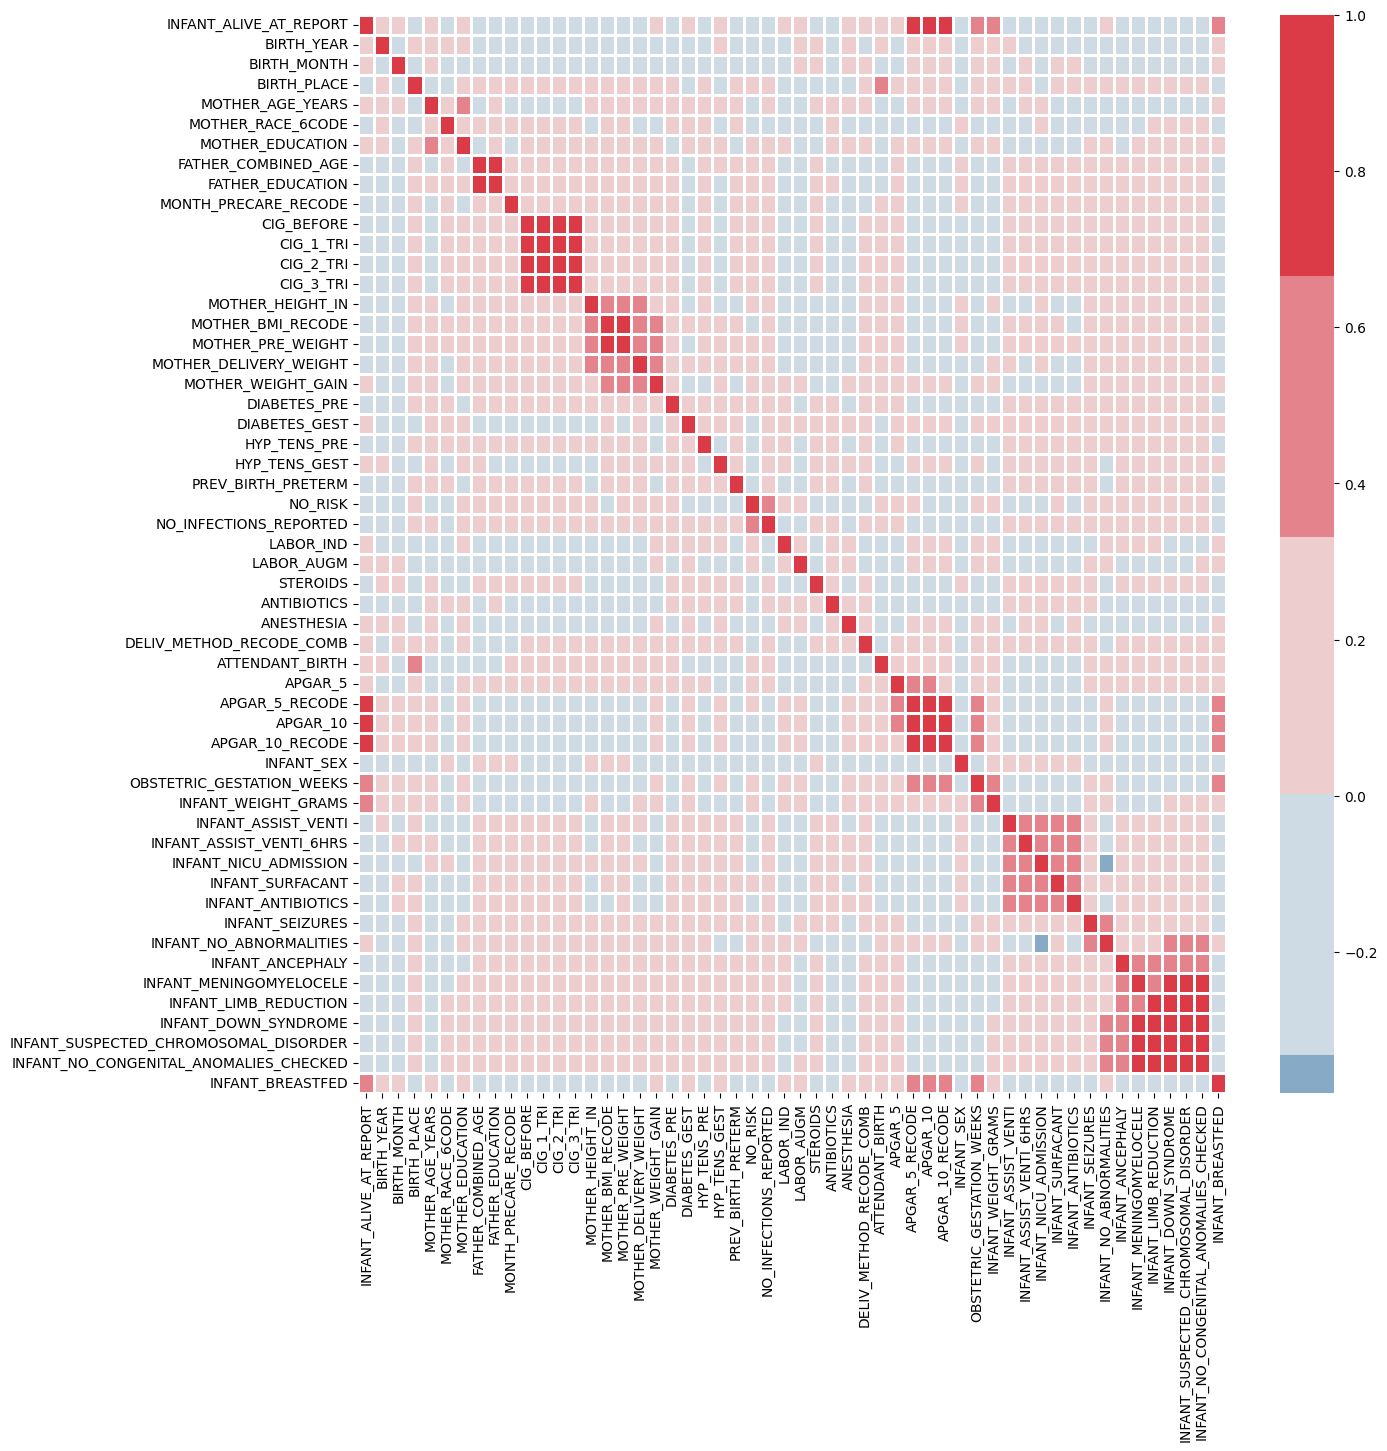

In [34]:
cor_matrix = pdf.corr().round(2)
fig = plt.figure(figsize=(14,14))
# mask = np.zeros_like(cor_matrix)
# mask[np.triu_indices_from(mask)] = True
plt.gca().set_facecolor('lightyellow')

cmap=sb.diverging_palette(240, 10, s=75, l=50, sep=1, n=6, center='light', as_cmap=False)
sb.heatmap(cor_matrix, center=0, annot=False, cmap=cmap, mask=False, linewidths=2)
plt.show()

In [49]:
features = []
cor = cor_matrix.INFANT_ALIVE_AT_REPORT.values
for i in range(len(cor)):
    if cor[i] > 0.05 or cor[i] < -0.05:
        features.append(cor_matrix.index.to_list()[i])

len(features)

print(len(features), features)

39 ['INFANT_ALIVE_AT_REPORT', 'FATHER_COMBINED_AGE', 'FATHER_EDUCATION', 'MONTH_PRECARE_RECODE', 'CIG_BEFORE', 'CIG_1_TRI', 'CIG_2_TRI', 'CIG_3_TRI', 'MOTHER_HEIGHT_IN', 'MOTHER_BMI_RECODE', 'MOTHER_PRE_WEIGHT', 'MOTHER_DELIVERY_WEIGHT', 'MOTHER_WEIGHT_GAIN', 'DIABETES_PRE', 'DIABETES_GEST', 'PREV_BIRTH_PRETERM', 'NO_INFECTIONS_REPORTED', 'LABOR_IND', 'LABOR_AUGM', 'STEROIDS', 'ANESTHESIA', 'APGAR_5_RECODE', 'APGAR_10', 'APGAR_10_RECODE', 'OBSTETRIC_GESTATION_WEEKS', 'INFANT_WEIGHT_GRAMS', 'INFANT_ASSIST_VENTI', 'INFANT_ASSIST_VENTI_6HRS', 'INFANT_NICU_ADMISSION', 'INFANT_SURFACANT', 'INFANT_ANTIBIOTICS', 'INFANT_SEIZURES', 'INFANT_NO_ABNORMALITIES', 'INFANT_ANCEPHALY', 'INFANT_MENINGOMYELOCELE', 'INFANT_LIMB_REDUCTION', 'INFANT_DOWN_SYNDROME', 'INFANT_SUSPECTED_CHROMOSOMAL_DISORDER', 'INFANT_BREASTFED']


In [36]:
corr = pdf.corr(numeric_only=True)
corr.style.background_gradient(cmap='Blues')

,INFANT_ALIVE_AT_REPORT,BIRTH_YEAR,BIRTH_MONTH,BIRTH_PLACE,MOTHER_AGE_YEARS,MOTHER_RACE_6CODE,MOTHER_EDUCATION,FATHER_COMBINED_AGE,FATHER_EDUCATION,MONTH_PRECARE_RECODE,CIG_BEFORE,CIG_1_TRI,CIG_2_TRI,CIG_3_TRI,MOTHER_HEIGHT_IN,MOTHER_BMI_RECODE,MOTHER_PRE_WEIGHT,MOTHER_DELIVERY_WEIGHT,MOTHER_WEIGHT_GAIN,DIABETES_PRE,DIABETES_GEST,HYP_TENS_PRE,HYP_TENS_GEST,PREV_BIRTH_PRETERM,NO_RISK,NO_INFECTIONS_REPORTED,LABOR_IND,LABOR_AUGM,STEROIDS,ANTIBIOTICS,ANESTHESIA,DELIV_METHOD_RECODE_COMB,ATTENDANT_BIRTH,APGAR_5,APGAR_5_RECODE,APGAR_10,APGAR_10_RECODE,INFANT_SEX,OBSTETRIC_GESTATION_WEEKS,INFANT_WEIGHT_GRAMS,INFANT_ASSIST_VENTI,INFANT_ASSIST_VENTI_6HRS,INFANT_NICU_ADMISSION,INFANT_SURFACANT,INFANT_ANTIBIOTICS,INFANT_SEIZURES,INFANT_NO_ABNORMALITIES,INFANT_ANCEPHALY,INFANT_MENINGOMYELOCELE,INFANT_LIMB_REDUCTION,INFANT_DOWN_SYNDROME,INFANT_SUSPECTED_CHROMOSOMAL_DISORDER,INFANT_NO_CONGENITAL_ANOMALIES_CHECKED,INFANT_BREASTFED
INFANT_ALIVE_AT_REPORT,1.000000,0.007314,0.015969,-0.052038,0.014420,-0.049249,0.014247,-0.185567,-0.116668,-0.204574,-0.062613,-0.066344,-0.067201,-0.068917,-0.072014,-0.183253,-0.161375,-0.098472,0.100078,-0.056184,0.060670,-0.045016,0.017853,-0.113294,-0.015559,-0.064356,0.139431,0.145708,-0.174121,-0.021539,0.277639,0.024978,0.025709,0.023782,0.772575,0.674877,0.707810,-0.037615,0.584719,0.339789,-0.257027,-0.170113,-0.249073,-0.160896,-0.108161,-0.081688,0.081109,-0.128887,-0.092692,-0.096442,-0.080100,-0.076870,-0.045768,0.637027
BIRTH_YEAR,0.007314,1.000000,-0.001892,0.010643,0.011238,0.008861,0.007474,0.004378,0.001315,-0.008282,-0.033768,-0.032317,-0.033326,-0.033048,-0.023934,-0.007360,-0.005049,-0.004188,-0.003501,0.002443,-0.004629,-0.000480,0.007068,-0.000427,0.002439,-0.006971,0.004226,0.006106,0.006157,0.004000,0.007272,-0.020684,0.014843,0.002559,0.012072,0.009556,0.009289,-0.005616,0.006415,0.006716,0.005781,0.001007,-0.001913,0.002278,-0.000230,-0.005326,-0.005873,-0.014109,-0.018018,-0.017712,-0.022994,-0.016944,-0.022753,0.007705
BIRTH_MONTH,0.015969,-0.001892,1.000000,-0.012309,0.010300,0.002542,-0.001680,-0.004865,-0.015000,-0.019471,-0.017952,-0.019791,-0.020464,-0.021623,-0.019737,-0.004226,-0.007156,-0.013980,-0.009201,-0.005663,0.000930,-0.006490,-0.000282,0.004139,-0.004678,-0.013022,0.001242,0.007380,0.006770,0.004813,0.008951,0.007684,-0.005409,-0.005750,0.019286,0.019082,0.020498,0.004446,0.018171,0.010434,0.004646,0.010334,0.003849,0.013312,0.010253,-0.003740,-0.005984,-0.007262,-0.007712,-0.008654,-0.009150,-0.008516,-0.008892,0.010871
BIRTH_PLACE,-0.052038,0.010643,-0.012309,1.000000,0.001581,0.004190,0.009848,0.045821,0.036582,0.080609,0.051743,0.049944,0.049132,0.048525,0.076564,0.050468,0.070534,0.085672,0.051378,0.029321,-0.000912,0.012682,-0.006719,0.011040,0.095955,0.093071,-0.046680,-0.038028,-0.007989,-0.053918,-0.139915,0.007783,0.483990,0.319547,0.086217,0.053771,0.039048,0.002347,0.035996,0.029318,0.046250,0.026947,-0.000198,0.020053,0.011750,0.068642,0.075936,0.031479,0.064814,0.062845,0.075897,0.071354,0.076029,-0.026463
MOTHER_AGE_YEARS,0.014420,0.011238,0.010300,0.001581,1.000000,0.006713,0.338774,-0.035203,0.025372,-0.056479,-0.029697,-0.020519,-0.017985,-0.017261,0.041911,0.049449,0.028520,0.022333,0.014624,0.045668,0.097067,0.074738,0.018918,0.057340,-0.141239,0.013314,-0.016770,-0.037132,0.008787,0.009676,0.012336,0.084739,-0.022357,-0.003273,0.017235,0.024105,0.024636,-0.010984,0.011343,0.024138,-0.003088,0.007156,0.019896,-0.003072,-0.002426,0.001239,-0.009486,-0.008927,-0.000305,0.000042,-0.002466,-0.011057,-0.005131,0.057826
MOTHER_RACE_6CODE,-0.049249,0.008861,0.002542,0.004190,0.006713,1.000000,0.031206,0.082831,0.097522,0.037730,0.028409,0.032898,0.033625,0.034906,-0.017235,0.016871,0.021446,0.001908,-0.009030,0.006411,0.013468,0.013725,-0.002942,0.013166,-0.002640,-0.003135,-0.020988,-0.000652,0.004696,0.010477,-0.029826,-0.016415,-0.003127,0.000132,-0.044277,-0.027376,-0.031254,0.008375,-0.056185,-0.028878,0.000623,-0.001092,0.015587,0.002214,0.002156,-0.0

24/02/22 19:53:36 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 213475 ms exceeds timeout 120000 ms
24/02/22 19:53:36 WARN SparkContext: Killing executors is not supported by current scheduler.
24/02/22 19:53:40 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$